<div style="background: #DDE2FF;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 20px 5px 0px 5px; 
            border: 10px solid #DDE2FF; 
            margin-left: 1px;
            margin-right: 1px;"
          
 <font color='blue'>**Trefethen p28 to p40**.
 
 This notebook showcases the third fifteen problems in Trefethen's classic book _Spectral Methods in MATLAB_. These problems have been ported to Python by Orlando Camargo Rodríguez.  <br><br>
 
 

    
</font>
</div>



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 28 : Eigenmodes of the laplacian on the disk

Note: the "cheb" shown here is the cheb of Rodríguez, which is distinct from that of CPraveen.


</font>
</div>

In [2]:
from numpy import *
from numpy import matlib

def cheb(N):
    # CHEB  compute D = differentiation matrix, x = Chebyshev grid
    D = []
    x = []
    if N==0:
       D = 0.0 
       x = 1.0
    else:
       i = arange(0,N+1)
       x = cos( pi*i/N )
       c = ones(N+1)
       c[ 0] = 2.0
       c[-1] = 2.0
       c = c*( -1 )**( arange(0,N+1) )
       X = matlib.repmat(x,N+1,1).transpose()
       dX = X - X.transpose()
       C = zeros((N+1,N+1))
       for i in range(N+1):
           for j in range(N+1): 
               C[i,j] = c[i]*1.0/c[j]
       D  = C/( dX + eye(N+1) ) # off-diagonal entries
       S = sum( D, axis = 1 )
       D  = D - diag(S) # diagonal entries
    return D,x


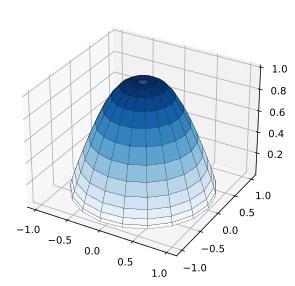

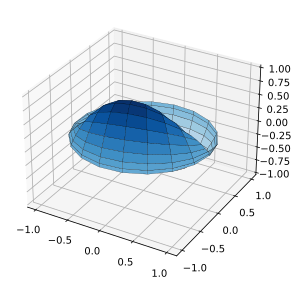

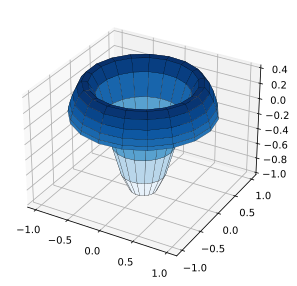

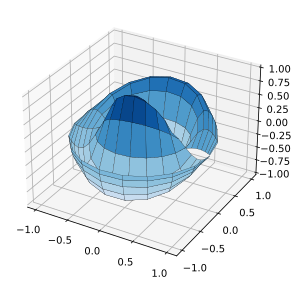

In [39]:
#from cheb  import *
from numpy import * 
from scipy import * 
from scipy import linalg
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import axes3d
%config InlineBackend.figure_formats = ['svg']

# eigenmodes of Laplacian on the disk

# r coordinate, ranging from -1 to 1 (N must be odd):
N = 25
#N2 = (N-1)/2 alternate statement of variable avoids error
N2 = 12
D,r = cheb(N)
DD = matmul(D,D)
D1 = DD[1:N2+1,1:N2+1]
E1 =  D[1:N2+1,1:N2+1]
i = arange(-2,-N2-2,-1)
D2 = DD[1:N2+1,i]
E2 =  D[1:N2+1,i]

# t = theta coordinate, ranging from 0 to 2*pi (M must be even):
M = 20 
dt = 2*pi/M 
t = dt*arange(1,M+1) 
#M2 = alternate statement of variable avoids error
M2 = 10 
c = zeros(1)
c[0] = -pi**2/(3*dt**2) - 1.0/6.0
c = append(c, 0.5*(-1)**arange(2,M+1)/sin( 0.5*dt*arange(1,M) )**2 )
D2t = linalg.toeplitz(c)

# Laplacian in polar coordinates:
R = diag( 1.0/r[1:N2+1] )
Z = zeros((M2,M2))
I = eye(M2)
RR = matmul(R,R)
ZI= hstack((Z,I))
IZ= hstack((I,Z))
ZIIZ = vstack((ZI,IZ))
M1 = D1 + matmul(R,E1)
M2 = D2 + matmul(R,E2)
L = kron( M1, eye(M) ) + kron( M2, ZIIZ ) + kron( RR, D2t )

# Compute eigenmodes:
Lam,V = linalg.eig(-L)
ii = argsort( Lam )
Lam = Lam[ii]
V   = V[:,ii]
index = [0,2,5,9]
Vaux = V[:,index]

# Plot eigenmodes with nodal lines underneath:
taux = linspace(0,2*pi,M)
rr,tt = meshgrid( r[0:N2+1], taux )
xx = rr*cos( tt )
yy = rr*sin( tt )
uu  = zeros((M,N2+1))
for i in range(4):
    fig = figure(i+1)
    ax = fig.add_subplot(111, projection='3d')
    u = reshape( Vaux[:,i], (N2,M) )
    u = u.transpose()
    uu[:,0:-1] = u
    uu[:,-1]   = u[:,-1]
    uv = reshape(uu,-1)
    uu = uu/linalg.norm(uv,inf)
    #ax.plot_surface(xx, yy, uu, color='b', linewidth=0.9)
    ax.plot_surface(xx, yy, uu, cmap=cm.Blues, edgecolor='black', linewidth=0.2)
show()


<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 29 : solve Poisson equation on the unit disk




</font>
</div>

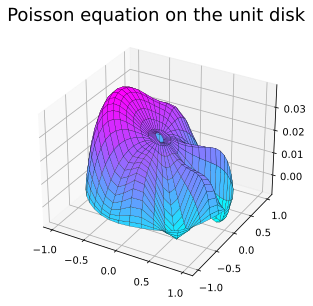

In [40]:
#from cheb  import *
from numpy import * 
from scipy import * 
from scipy import linalg
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import axes3d
%config InlineBackend.figure_formats = ['svg']

# solve Poisson equation on the unit disk

# Laplacian in polar coordinates:
N = 31 
[D,r] = cheb(N) 
#N2 = (N-1)/2 alternate declaration of variable avoids error
N2 = 15
DD = matmul(D,D)
D1 = DD[1:N2+1,1:N2+1]
E1 =  D[1:N2+1,1:N2+1]
i = arange(-2,-N2-2,-1)
D2 = DD[1:N2+1,i]
E2 =  D[1:N2+1,i]

M = 40 
dt = 2*pi/M 
t = dt*arange(1,M+1)
#M2 = M/2 alternate declaration of variable avoids error
M2=20
c = zeros(1)
c[0] = -pi**2/(3*dt**2) - 1.0/6.0
c = append(c, 0.5*(-1)**arange(2,M+1)/sin( 0.5*dt*arange(1,M) )**2 )
D2t = linalg.toeplitz(c)

# Laplacian in polar coordinates:
R = diag( 1.0/r[1:N2+1] )
Z = zeros((M2,M2))
I = eye(M2)
RR = matmul(R,R)
ZI= hstack((Z,I))
IZ= hstack((I,Z))
ZIIZ = vstack((ZI,IZ))
M1 = D1 + matmul(R,E1)
M2 = D2 + matmul(R,E2)
L = kron( M1, eye(M) ) + kron( M2, ZIIZ ) + kron( RR, D2t )

# Right-hand side and solution for u:
rr,tt = meshgrid( r[1:N2+1], t ) 
rrr   = reshape(rr.transpose(),-1)
ttr   = reshape(tt.transpose(),-1) 
f = -rrr**2*sin( 0.5*ttr )**4 + sin( 6*ttr )*cos( 0.5*ttr )**2
u = linalg.solve(L,f) # u = L\f

# Reshape results onto 2D grid and plot them:
u = reshape(u,(N2,M))
u = u.transpose()
uu = zeros((M,N2+1))
uu[:,0:-1] = u
uu[:,-1]   = u[:,-1]
rr,tt = meshgrid( r[0:N2+1],linspace(0,2*pi,M) )
xx = rr*cos( tt )
yy = rr*sin( tt )
fig = figure(1)
ax = fig.add_subplot(111, projection='3d')
#ax.plot_wireframe(xx, yy, uu, color='b', linewidth=0.9)

ax.plot_surface(xx, yy, uu, cmap=cm.cool, edgecolor='black', linewidth=0.2)
title('Poisson equation on the unit disk',fontsize=18)
show()



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 30 : spectral integration, ODE-Style




</font>
</div>

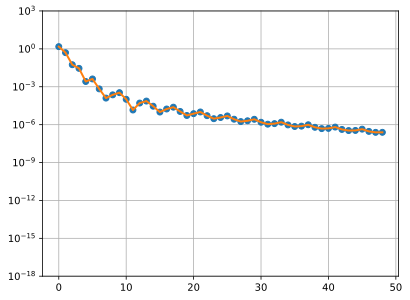

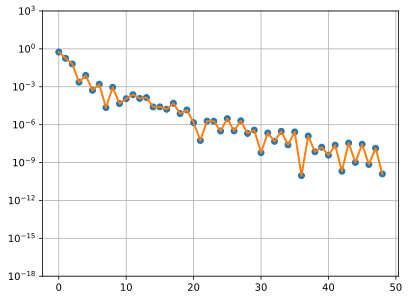

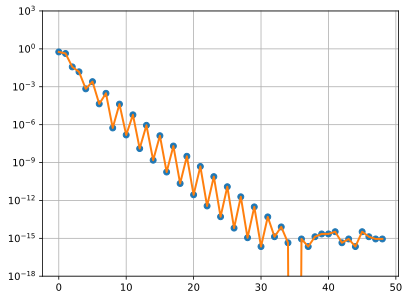

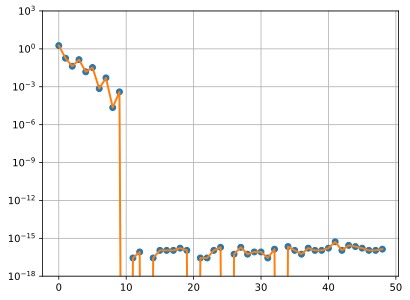

In [19]:
#from cheb  import *
from numpy import * 
from scipy import * 
from scipy import linalg
from scipy import special
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import axes3d

# spectral integration, ODE style

# Computation: various values of N, four functions:

Nmax = 50 
E = zeros((4,Nmax-1))
for N in range(1,Nmax):
    i = arange(0,N)
    D,x = cheb(N) 
    x = x[0:N]
    DN = D[0:N,0:N]
    Di = linalg.inv( DN )
    w = Di[0,:]
    f = abs(x)**3     
    E[0,N-1] = abs( dot(w,f) - 0.5) 
    f = exp( -x**(-2) ) 
    E[1,N-1] = abs( dot(w,f) - 2*( exp(-1) + sqrt(pi)*(special.erf(1) -1 ) ) )
    f = 1.0/( 1 + x**2 )   
    E[2,N-1] = abs( dot(w,f) - 0.5*pi )
    f = x**10 
    E[3,N-1] = abs( dot(w,f) - 2.0/11.0 )

# Plot results:
for iplot in range(4):
    figure(iplot+1) 
    semilogy(E[iplot,:] + 1e-100,'o')
    plot(    E[iplot,:] + 1e-100, linewidth=2 )
    ylim(1e-18, 1e3)
    grid(True)
show()



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 30c : More spectral integration, ODE-style


</font>
</div>


In [20]:
# CLENCURT  nodes x (Chebyshev points) and weights w
#           for Clenshaw-Curtis quadrature
from numpy import *

def clencurt(N):
  theta = pi*arange(0,N+1)/N 
  x = cos(theta)
  w = zeros(N+1) 
  ii = arange(1,N)
  v = ones(N-1)
  if mod(N,2) == 0:
    w[ 0] = 1.0/(N**2-1) 
    w[-1] = w[0]
    for k in arange(1,N/2): 
        v = v - 2*cos( 2*k*theta[ii] )/( 4*k**2 - 1 )
        v = v - cos( N*theta[ii] )/(N**2 - 1 )
  else:
    w[ 0] = 1.0/N**2
    w[-1] = w[0]
    for k in arange(1,(N-1)/2+1): 
        v = v - 2*cos( 2*k*theta[ii] )/( 4*k**2 - 1 )
  w[ii] = 2*v/N
  return x,w



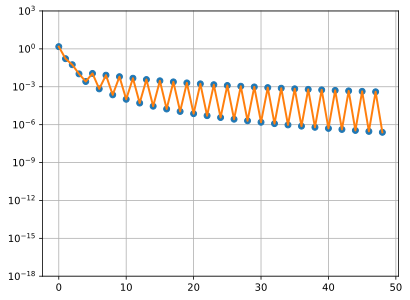

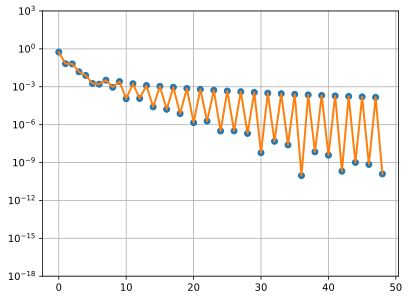

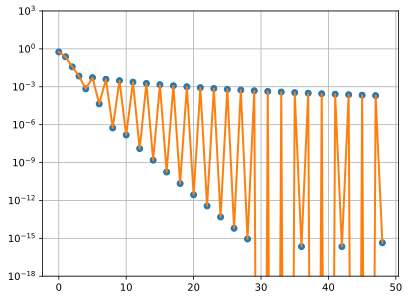

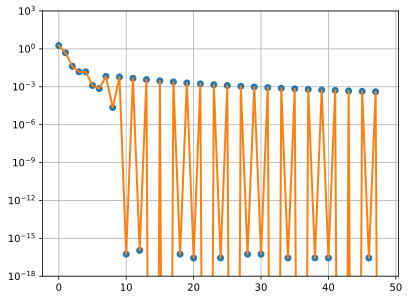

In [21]:
#from clencurt import *
from numpy import * 
from scipy import * 
from scipy import linalg
from scipy import special
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import axes3d

# spectral integration, ODE style

# Computation: various values of N, four functions:

Nmax = 50 
E = zeros((4,Nmax-1))
for N in range(1,Nmax):
    i = arange(0,N)
    x,w = clencurt(N)
    f = abs(x)**3     
    E[0,N-1] = abs( dot(w,f) - 0.5) 
    f = exp( -x**(-2) ) 
    E[1,N-1] = abs( dot(w,f) - 2*( exp(-1) + sqrt(pi)*(special.erf(1) -1 ) ) )
    f = 1.0/( 1 + x**2 )   
    E[2,N-1] = abs( dot(w,f) - 0.5*pi )
    f = x**10 
    E[3,N-1] = abs( dot(w,f) - 2.0/11.0 )

# Plot results:
for iplot in range(4):
    figure(iplot+1) 
    semilogy(E[iplot,:] + 1e-100,'o')
    plot(    E[iplot,:] + 1e-100, linewidth=2 )
    ylim(1e-18, 1e3)
    grid(True)
show()



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 30g : Still more spectral integration, ODE-style


</font>
</div>


In [22]:
from numpy import *
from scipy import *
from scipy import linalg
# GAUSS  nodes x (Legendre points) and weights w
#        for Gauss quadrature

def gauss(N):
  beta = 0.5/sqrt( 1.0 - ( 2.0*arange(1,N) )**(-2) )
  T = diag(beta,1) + diag(beta,-1)
  x,V = linalg.eig(T)
  i = argsort( x )
  x = x[i]
  w = 2*V[0,i]**2
  return x,w



C:\Users\gary\AppData\Local\Temp\ipykernel_6208\3930596895.py:19: RuntimeWarning: invalid value encountered in power
  f = exp( -x**(-2) )


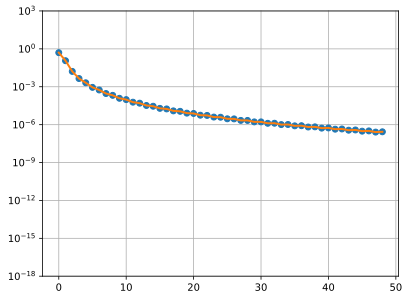

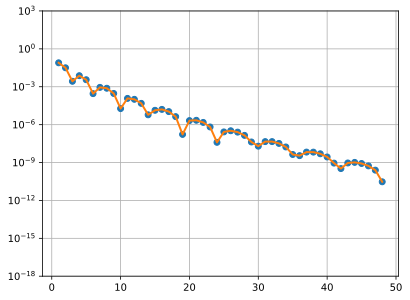

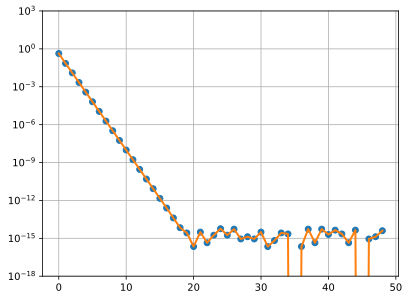

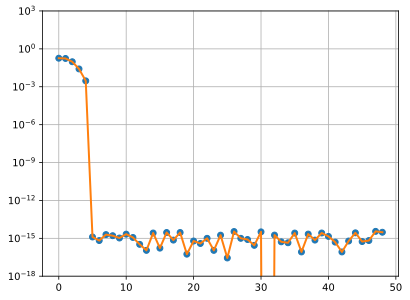

In [24]:
#from gauss import *
from numpy import * 
from scipy import * 
from scipy import linalg
from scipy import special
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import axes3d

# spectral integration, ODE style

# Computation: various values of N, four functions:

Nmax = 50 
E = zeros((4,Nmax-1))
for N in range(1,Nmax):
    x,w = gauss(N)
    f = abs(x)**3     
    E[0,N-1] = abs( dot(w,f) - 0.5) 
    f = exp( -x**(-2) ) 
    E[1,N-1] = abs( dot(w,f) - 2*( exp(-1) + sqrt(pi)*(special.erf(1) -1 ) ) )
    f = 1.0/( 1 + x**2 )   
    E[2,N-1] = abs( dot(w,f) - 0.5*pi )
    f = x**10 
    E[3,N-1] = abs( dot(w,f) - 2.0/11.0 )

# Plot results:
for iplot in range(4):
    figure(iplot+1) 
    semilogy(E[iplot,:] + 1e-100,'o')
    plot(    E[iplot,:] + 1e-100, linewidth=2 )
    ylim(1e-18, 1e3)
    grid(True)
show()



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 31 : gamma function via complex integral, trapezoid rule


</font>
</div>

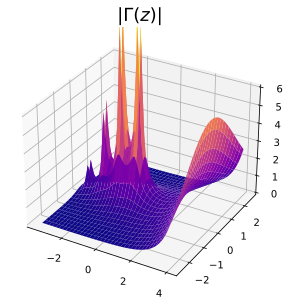

In [41]:
from numpy import * 
from scipy import * 
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import axes3d
%config InlineBackend.figure_formats = ['svg']

# gamma function via complex integral, trapezoid rule
N = 70 
i = arange(0.5,N)
theta = -pi + (2*pi/N)*i
c = -11.0 # center of circle of integration
r =  16.0 # radius of circle of integration
x = arange(-3.5,4.1,0.1)
y = arange(-2.5,2.6,0.1)
xx,yy = meshgrid(x,y)
zz = xx + 1j*yy
gaminv = 0
for i in range(N):         
    t = c + r*exp(1j*theta[i])
    gaminv = gaminv + exp(t)*t**(-zz)*(t-c)
gaminv = gaminv/N
gam    = 1.0/gaminv
fig = figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, abs(gam), cmap=cm.plasma, linewidth = 0.9)
ax.set_zlim(0,6)
title(r'$|\Gamma(z)|$',fontsize=18)
grid(True)
show()




<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 32 : solve u_xx = exp(4x), u(-1)=0, u(1)=1 (compare p13.m)


</font>
</div>

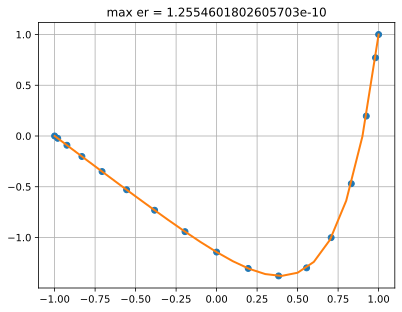

In [27]:
#from cheb import * 
from numpy import * 
from scipy import * 
from scipy import linalg
from matplotlib.pyplot import *

# solve u_xx = exp(4x), u(-1)=0, u(1)=1 (compare p13.m)

N = 16
D,x = cheb(N)
DD = matmul(D,D)
D2 = DD[1:N,1:N]
f = exp(4*x[1:N])
u = linalg.solve(D2,f) # u = D2\f;
ux = 0
ux = append(ux,u)
ux = append(ux,0) + 0.5*(x+1)
xx  = arange(-1,1.1,0.1)
uxx = polyval(polyfit(x,ux,N),xx)
exact = (exp(4*xx) - xx*sinh(4) - cosh(4))/16.0 + 0.5*(xx + 1)
figure(1)
plot(x,ux,'o')
plot(xx,uxx,linewidth=2)
thetitle = 'max er = ' + str(linalg.norm(uxx-exact,inf))
title( thetitle )
grid(True)
show()



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 33 : solve linear BVP u_xx = exp(4x), u'(-1)=u(1)=0




</font>
</div>

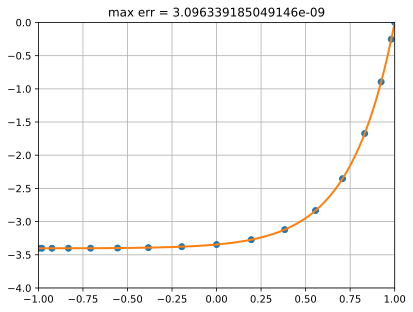

In [28]:
#from cheb  import *
from numpy import * 
from scipy import * 
from scipy import linalg
from matplotlib.pyplot import *

# solve linear BVP u_xx = exp(4x), u'(-1)=u(1)=0

N = 16
D,x = cheb(N)
DD = matmul(D,D)      
DD[-1,:] = D[-1,:] # Neumann condition at x = -1
D2 = DD[1:,1:]                
f = exp( 4*x[1:] )
f[-1] = 0.0
u = linalg.solve(D2,f) # u = D2\[f;0];
ux = 0
ux = append(ux,u)
xx = arange(-1,1.01,0.01)
uxx = polyval(polyfit(x,ux,N),xx)
exact = ( exp(4*xx) - 4*exp(-4)*(xx-1) - exp(4) )/16.0 
maxerr = linalg.norm(uxx-exact,inf)
thetitle = 'max err = ' + str(maxerr)
figure(1)
plot(x,ux,'o')
plot(xx,uxx,linewidth=2)
#plot(xx,exact,linewidth=2)
title( thetitle )
xlim(-1,1)
ylim(-4,0)
grid(True)
show()



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 34 : Allen-Cahn eq. u_t = eps*u_xx+u-u^3, u(-1)=-1, u(1)=1




</font>
</div>

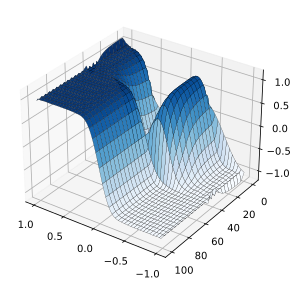

In [38]:
#from cheb  import *
%config InlineBackend.figure_formats = ['svg']
from numpy import *
from scipy import *
from scipy import linalg 
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import axes3d

# Allen-Cahn eq. u_t = eps*u_xx+u-u^3, u(-1)=-1, u(1)=1

# Differentiation matrix and initial data:
N = 20 
[D,x] = cheb(N) 
D2 = matmul(D,D) # use full-size matrix
D2[:, 0] = 0.0 # for convenience
D2[:,-1] = 0.0
eps = 0.01 
dt = min([.01,50*N**(-4)/eps])
t = 0 
v = 0.53*x + 0.47*sin( -1.5*pi*x )

# Solve PDE by Euler formula and plot results:
tmax =  100 
tplot = 2.0 
nplots  = int(tmax/tplot)
plotgap = int(tplot/dt  ) 
dt = tplot/plotgap
xx = arange(-1,1.025,0.025)
vv = polyval(polyfit(x,v,N),xx)
plotdata = vstack((vv,zeros((nplots,xx.size))))
tdata = t
for i in range(nplots):
    for n in range(plotgap):
      t = t + dt
      v = v + dt*( eps*D2.dot(v-x) + v - v**3 ) # Euler
    vv = polyval(polyfit(x,v,N),xx)
    plotdata[i+1,:] = vv 
    tdata = append(tdata, t)
fig = figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=30, azim=125, roll=0)
XX,YY = meshgrid(xx,tdata)
ax.plot_surface(XX, YY, plotdata, cmap=cm.Blues, edgecolor='black', linewidth = 0.2)

show()



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 35 : Allen-Cahn eq. with boundary condition imposed explicitly ("method (II)")

</font>
</div>

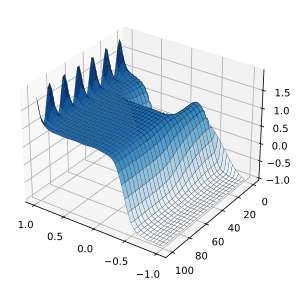

In [42]:
#from cheb  import *
from numpy import *
from scipy import *
from scipy import linalg 
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import axes3d

# Allen-Cahn eq. with boundary condition
# imposed explicitly ("method (II)")

# Differentiation matrix and initial data:
N = 20 
[D,x] = cheb(N) 
D2 = matmul(D,D) # use full-size matrix
eps = 0.01 
dt = min([.01,50*N**(-4)/eps])
t = 0 
v = 0.53*x + 0.47*sin( -1.5*pi*x )

# Solve PDE by Euler formula and plot results:
tmax =  100 
tplot = 2.0 
nplots  = int(tmax/tplot)
plotgap = int(tplot/dt  ) 
dt = tplot/plotgap
xx = arange(-1,1.025,0.025)
vv = polyval(polyfit(x,v,N),xx)
plotdata = vstack((vv,zeros((nplots,xx.size))))
tdata = t
for i in range(nplots):
    for n in range(plotgap):
      t = t + dt
      v = v + dt*( eps*D2.dot(v-x) + v - v**3 ) # Euler
      v[ 0] =  1.0 + sin( t/5.0 )**2
      v[-1] = -1.0
    vv = polyval(polyfit(x,v,N),xx)
    plotdata[i+1,:] = vv 
    tdata = append(tdata, t)
fig = figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=30, azim=125, roll=0)
XX,YY = meshgrid(xx,tdata)
ax.plot_surface(XX, YY, plotdata, cmap=cm.Blues, edgecolor='black', linewidth = 0.2)
show()



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 36 : Laplace eq. on [-1,1]x[-1,1] with nonzero BCs

</font>
</div>

C:\Users\gary\AppData\Local\Temp\ipykernel_10688\1864508514.py:47: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  interpolator = interpolate.interp2d(x,y,uu,'cubic')
C:\Users\gary\AppData\Local\Temp\ipykernel_10688\1864508514.py:48: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
       

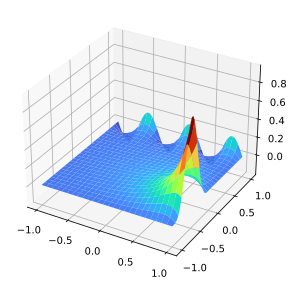

In [43]:
#from cheb  import *
from numpy import * 
from scipy import * 
from scipy import interpolate
from scipy import linalg
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import axes3d
%config InlineBackend.figure_formats = ['svg']

# Laplace eq. on [-1,1]x[-1,1] with nonzero BCs

# Set up grid and 2D Laplacian, boundary points included:
N = 24 
D,x = cheb(N) 
y = x
xx,yy = meshgrid(x,y)
xxr = reshape(xx.transpose(),-1)
yyr = reshape(yy.transpose(),-1)
D2 = matmul(D,D)
I = eye(N+1)
L = kron(I,D2) + kron(D2,I)

# Impose boundary conditions by replacing appropriate rows of L:
bw = where( ( abs(xxr) == 1 )|( abs(yyr) == 1 ) )
b = bw[0]
n = b.size
L[b,:] = zeros((4*N,(N+1)**2))
for i in range(n):
    for j in range(n):
        if i == j:
           L[b[i],b[j]] = 1.0
        else:
           L[b[i],b[j]] = 0.0

yyri = zeros(n); i = where( yyr[b] == 1 ); yyri[ i[0] ] = 1.0
xxri = zeros(n); i = where( xxr[b] <  0 ); xxri[ i[0] ] = xxr[i[0]]
XXri = zeros(n); i = where( xxr[b] == 1 ); XXri[ i[0] ] = 1.0
rhs = zeros((N+1)**2)
rhs[b] = yyri*xxri*sin( pi*xxr[b] )**4 + 0.2*XXri*sin( 3*pi*yyr[b] )

# Solve Laplace equation, reshape to 2D, and plot:
u = linalg.solve(L,rhs) # u = L\rhs; 
uu = reshape(u,(N+1,N+1))
x3 = arange(-1,1.04,0.04)
y3 = arange(-1,1.04,0.04)
[xxx,yyy] = meshgrid( x3 , y3 )
interpolator = interpolate.interp2d(x,y,uu,'cubic')
uuu = interpolator(x3,y3)
fig = figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xxx, yyy, uuu, cmap=cm.turbo, linewidth = 0.9)
show()
#  uuu = interp2(xx,yy,uu,xxx,yyy,'cubic');
#   subplot('position',[.1 .4 .8 .5])
#  mesh(xxx,yyy,uuu), colormap(1e-6*[1 1 1]);
#  axis([-1 1 -1 1 -.2 1]), view(-20,45)
#  text(0,.8,.4,sprintf('u(0,0) = #12.10f',uu(N/2+1,N/2+1)))



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 37 : "wave tank" with Neumann BCs for |y|=1

</font>
</div>

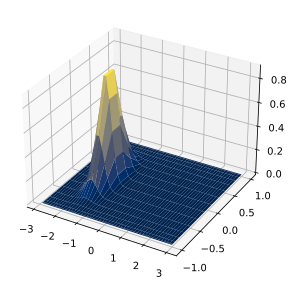

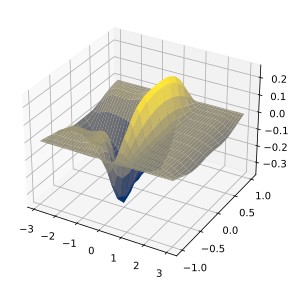

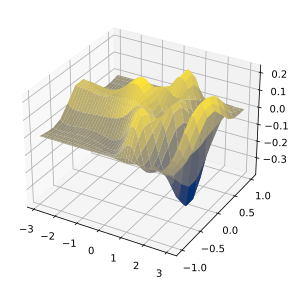

In [44]:
#from cheb  import *
from numpy import * 
from scipy import * 
from scipy import linalg
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import axes3d
%config InlineBackend.figure_formats = ['svg']

# "wave tank" with Neumann BCs for |y|=1

# x variable in [-A,A], Fourier:
A  = 3.0
Nx = 50
dx = 2*A/Nx
x = -A + dx*arange(1,Nx+1)
c  = -1.0/(3.0*(dx/A)**2) - 1.0/6.0
c2 =  0.5*(-1)**( arange(2,Nx+1) )/sin( (pi*dx/A)*( 0.5*arange(1,Nx) ) )**2
c = append(c, c2)
D2x = (pi/A)**2*linalg.toeplitz(c)

# y variable in [-1,1], Chebyshev:
Ny = 15 
Dy,y = cheb(Ny) 
D2y = matmul(Dy,Dy)
DY = zeros((2,2))
DY[0,0] = Dy[ 0, 0]
DY[0,1] = Dy[ 0,-1]
DY[1,0] = Dy[-1, 0]
DY[1,1] = Dy[-1,-1]
FY = zeros((2,Ny-1))
FY[0,:] = Dy[ 0,1:Ny]
FY[1,:] = Dy[-1,1:Ny]
BC = linalg.solve(DY,FY)

# Grid and initial data:
xx,yy = meshgrid(x,y)
vv = exp(- 8*( ( xx + 1.5)**2 + yy**2 ) )
dt = 5.0/( Nx + Ny**2 ) 
vvold = exp( -8*( ( xx + dt + 1.5 )**2 + yy**2 ) )

# Time-stepping by leap frog formula:
plotgap = int( 2.0/dt ) 
dt = 2.0/plotgap
j = 0
for n in range( 2*plotgap+1 ):
    t = n*dt
    if mod( n + .5, plotgap ) < 1:
       j = j + 1
       fig = figure(j)
       ax = fig.add_subplot(111, projection='3d')
       ax.plot_surface(xx, yy, vv, cmap=cm.cividis, linewidth = 0.9)
    vvnew = 2*vv - vvold + dt**2*( matmul(vv,D2x) + matmul(D2y,vv) )
    vvold = vv 
    vv    = vvnew
    # Neumann BCs for |y| = 1
    prod = matmul(BC,vv[1:Ny,:])
    vv[ 0,:] = prod[0,:]
    vv[-1,:] = prod[1,:]
show()










<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 38 : solve $u_{xxxx}$ = exp(x), u(-1)=u(1)=u'(-1)=u'(1)=0


</font>
</div>

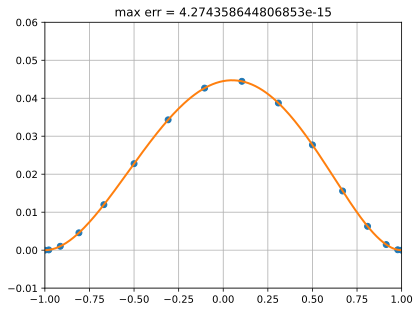

In [40]:
#from cheb  import *
from numpy import * 
from scipy import * 
from scipy import linalg
from matplotlib.pyplot import *

# solve u_xxxx = exp(x), u(-1)=u(1)=u'(-1)=u'(1)=0

# Construct discrete biharmonic operator:
N = 15 
D,x = cheb(N)
c = 0
c = append(c, 1.0/( 1 - x[1:N]**2 ) )
c = append( c , 0 )
S = diag( c )
D2 = matmul(D ,D )
D3 = matmul(D2,D )
D4 = matmul(D2,D2)
C1 = diag( 1.0 - x**2 )
C2 = diag( x )
M = matmul(C1,D4) - matmul(8*C2,D3) - 12*D2
D4 = matmul(M,S)
Div = D4[1:N,1:N]

# Solve boundary-value problem and plot result:
f = exp( x[1:N] ) 
u = linalg.solve(Div,f) # u = D4\f; 
ux = 0
ux = append(ux,u)
ux = append(ux,0)
xx = arange(-1,1.01,0.01)
uu = (1 - xx**2)*polyval(polyfit(x,matmul(S,ux),N),xx)

# Determine exact solution and print maximum error:
A = array([[1, -1, 1, -1],[0, 1, -2, 3],[1, 1, 1, 1],[0, 1, 2, 3]])
V = vander(xx)
V2 = V[:,-1:-5:-1]
e = array([-1, -1, 1, 1])
e = exp(e)
c = linalg.solve(A,e) # c = A\exp([-1 -1 1 1]'); 
exact = exp(xx) - matmul(V2,c)
maxerr = linalg.norm(uu-exact,inf)
thetitle = 'max err = ' + str(maxerr)

figure(1)
plot(x,ux,'o')
plot(xx,uu,linewidth=2)
title( thetitle )
xlim(-1,1)
ylim(-0.01,0.06)
grid(True)
show()



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 39 : eigenmodes of biharmonic on a square with clamped BCs


</font>
</div>

C:\Users\gary\AppData\Local\Temp\ipykernel_6208\868330203.py:45: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  interpolator = interpolate.interp2d(x,x,uu,'cubic')
C:\Users\gary\AppData\Local\Temp\ipykernel_6208\868330203.py:46: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        sca

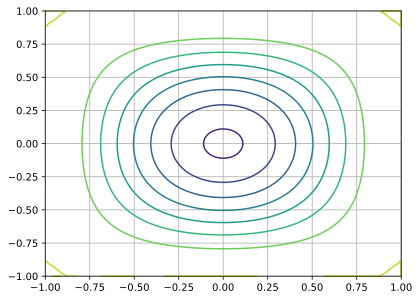

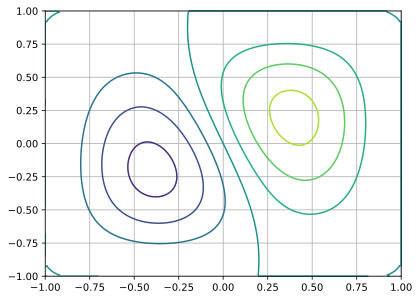

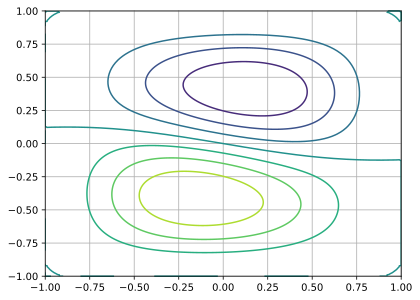

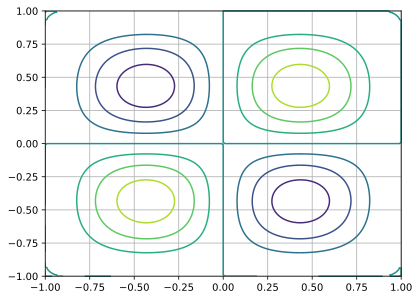

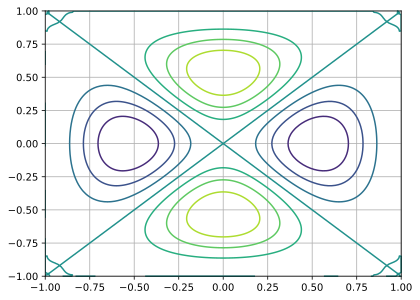

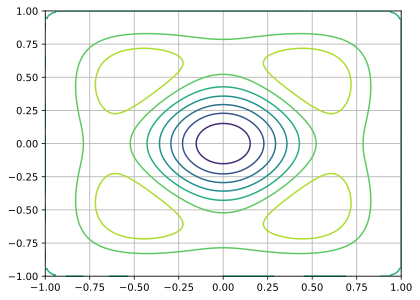

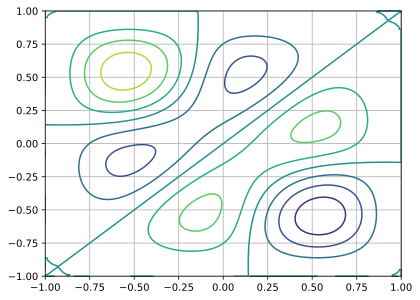

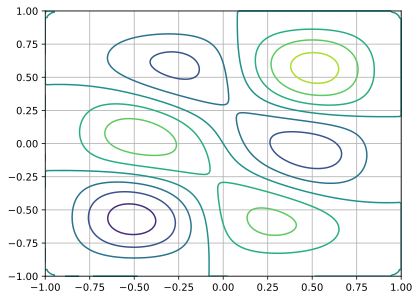

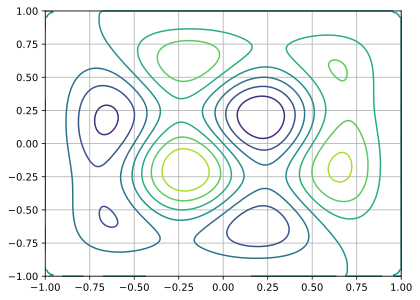

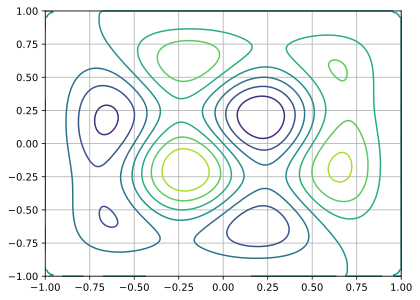

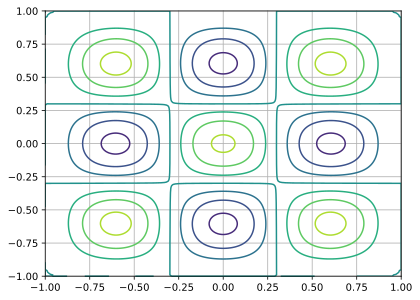

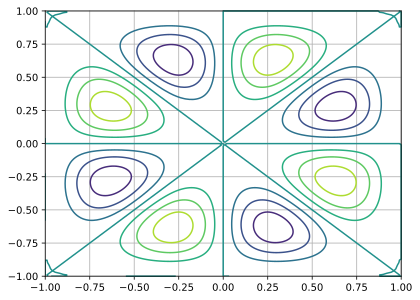

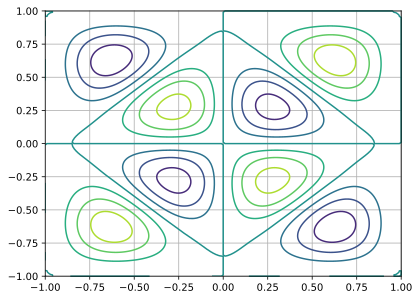

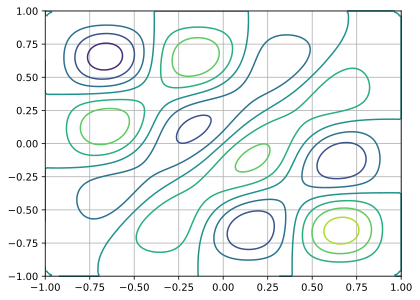

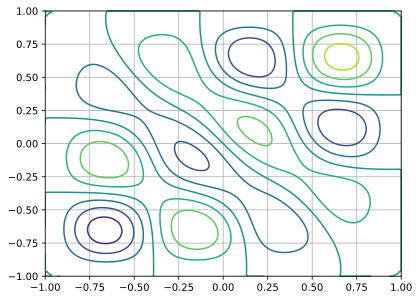

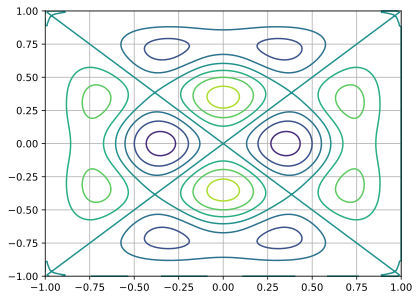

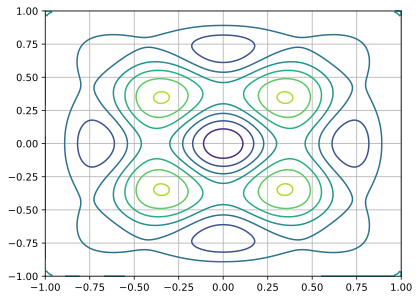

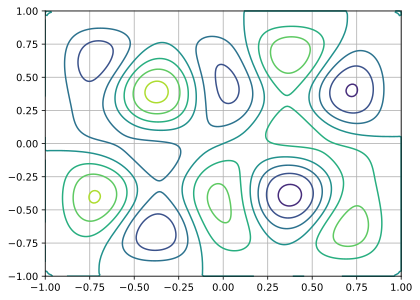

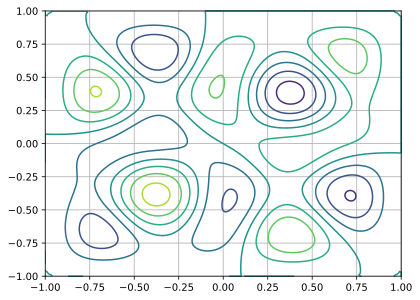

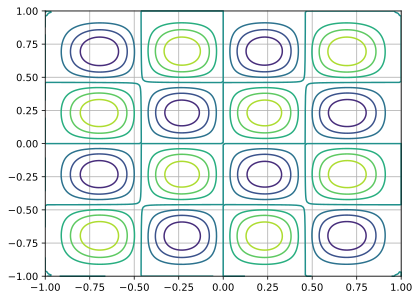

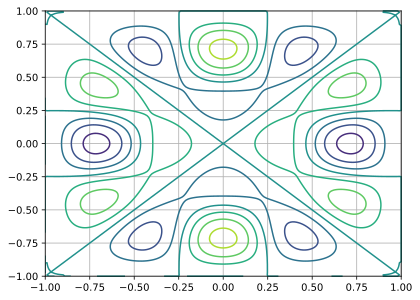

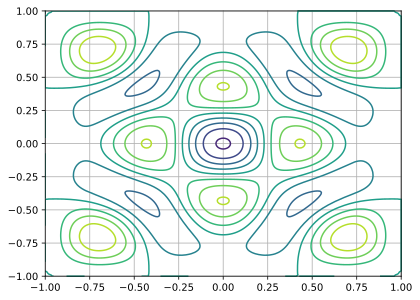

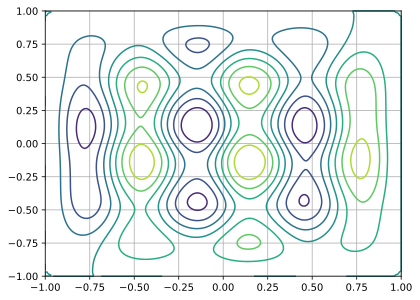

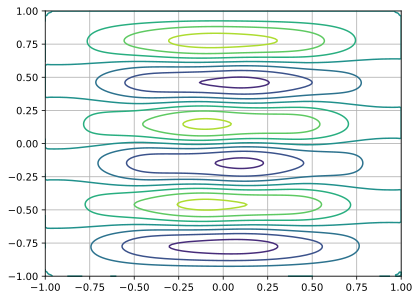

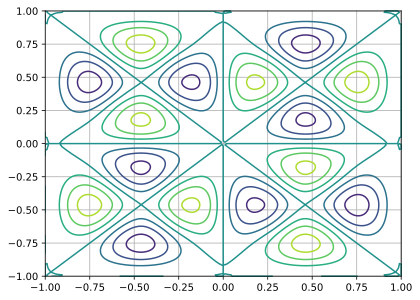

In [41]:
#from cheb  import *
from numpy import * 
from scipy import * 
from scipy import interpolate
from scipy import linalg
from matplotlib.pyplot import *

# eigenmodes of biharmonic on a square with clamped BCs

# Construct spectral approximation to biharmonic operator:
N = 17 
D,x = cheb(N)
c = 0
c = append(c, 1.0/( 1 - x[1:N]**2 ) )
c = append( c , 0 )
S = diag( c )
D2 = matmul(D ,D )
D3 = matmul(D2,D )
D4 = matmul(D2,D2)
C1 = diag( 1.0 - x**2 )
C2 = diag( x )
M = matmul(C1,D4) - matmul(8*C2,D3) - 12*D2
D4 = matmul(M,S)
Dii = D2[1:N,1:N]
Div = D4[1:N,1:N]

#  D4 = (diag(1-x.^2)*D^4 - 8*diag(x)*D^3 - 12*D^2)*S;
#  D4 = D4(2:N,2:N); 
I = eye(N-1)
L = kron(I,Div) + kron(Div,I) + 2.0*matmul( kron(Dii,I) , kron(I,Dii) )

# Find and plot 25 eigenmodes:
Lam,V = linalg.eig(-L) 
rLam = -real( Lam )
ii = argsort( rLam )
rLam = rLam[ii]; rLam = sqrt( rLam/rLam[0] )
V = V[:,ii]
xx,yy = meshgrid(x,x)
x2 = arange(-1,1.01,0.01)
xxx,yyy = meshgrid(x2,x2)
for i in range(25):
    uu = zeros((N+1,N+1))
    uu[1:N,1:N] = reshape(real(V[:,i]),(N-1,N-1))
    figure(i+1)
    interpolator = interpolate.interp2d(x,x,uu,'cubic') 
    uuu = interpolator(x2,x2)
    contour(x2,x2,uuu)
    grid(True)
show()



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 40 : eigenvalues of Orr-Sommerfeld operator


</font>
</div>

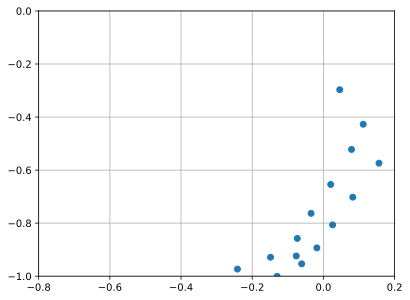

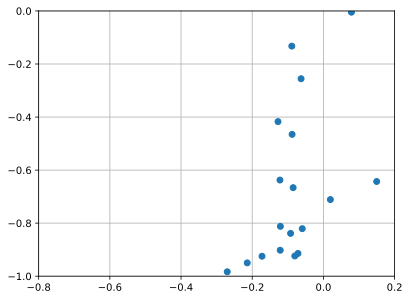

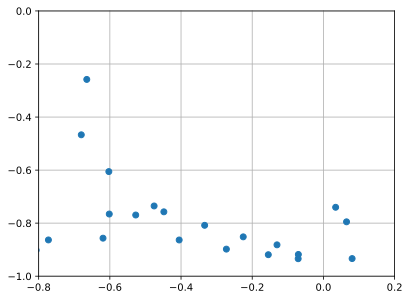

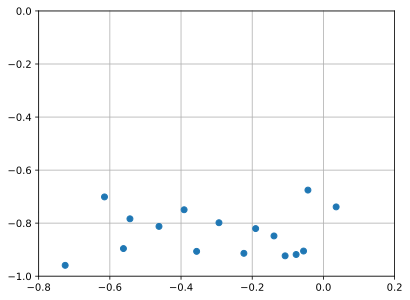

In [42]:
#from cheb  import *
from numpy import * 
from scipy import * 
from scipy import linalg
from matplotlib.pyplot import *

# eigenvalues of Orr-Sommerfeld operator

R = 5772
j = 0
for N in arange(40,120,20): # 2nd- and 4th-order differentiation matrices:
    D,x = cheb(N)
    D2 = matmul(D ,D)
    D3 = matmul(D2,D)
    D4 = matmul(D3,D)
    Dii = D2[1:N,1:N]
    c = 0
    c = append( c, 1.0/( 1.0 - x[1:N]**2) )
    c = append( c, 0 )
    S = diag( c )
    M = matmul( diag(1 - x++2), D4 ) - 8*matmul( diag(x), D3 ) - 12*D2
    D4 = matmul(M,S)
    Div = D4[1:N,1:N]
    # Orr-Sommerfeld operators A,B and generalized eigenvalues:
    I = eye(N-1)
    A = ( Div - 2*Dii + I )/R - 2*1j*I - 1j*matmul( diag( 1 - x[1:N]**2 ), ( Dii - I ) )
    B = Dii - I
    ee,L = linalg.eig(A,B)
    j = j + 1
    figure(j)
    plot(real(ee),imag(ee),'o')
    xlim(-.8,.2)
    ylim(-1, 0)
    grid(True)
show()


















